# core

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

---

## Hugging Face Datasets

In [ ]:
import logging; logging.disable(logging.WARNING)

In [ ]:
from datasets import load_dataset_builder
name = 'fashion_mnist'
ds_builder = load_dataset_builder(name); print(ds_builder.info.description)

In [ ]:
dir(ds_builder.info)

['_INCLUDED_INFO_IN_YAML',
 '__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_init__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_dump_info',
 '_dump_license',
 '_from_yaml_dict',
 '_to_yaml_dict',
 'builder_name',
 'citation',
 'config_name',
 'copy',
 'dataset_name',
 'dataset_size',
 'description',
 'download_checksums',
 'download_size',
 'features',
 'from_dict',
 'from_directory',
 'from_merge',
 'homepage',
 'license',
 'post_processed',
 'post_processing_size',
 'size_in_bytes',
 'splits',
 'supervised_keys',
 'task_templates',
 'update',
 'version',
 'write_to_directory']

In [ ]:
ds_builder.info.splits

{'train': SplitInfo(name='train', num_bytes=31304707, num_examples=60000, shard_lengths=None, dataset_name='fashion_mnist'),
 'test': SplitInfo(name='test', num_bytes=5235160, num_examples=10000, shard_lengths=None, dataset_name='fashion_mnist')}

In [ ]:
ds_builder.info.features

{'image': Image(mode=None, decode=True, id=None),
 'label': ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)}

In [ ]:
from datasets import load_dataset
dsd = load_dataset(name); dsd

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [ ]:
trn,tst= dsd['train'],dsd['test']; trn[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28>,
 'label': 9}

In [ ]:
x,y = ds_builder.info.features; x,y

('image', 'label')

In [ ]:
trn

Dataset({
    features: ['image', 'label'],
    num_rows: 60000
})

In [ ]:
img = trn[0][x]; img

In [ ]:
xb,yb = trn[:5][x],trn[:5][y]; yb

[9, 0, 0, 3, 0]

In [ ]:
trn.features

{'image': Image(mode=None, decode=True, id=None),
 'label': ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)}

In [ ]:
featy = trn.features[y]; featy

ClassLabel(names=['T - shirt / top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], id=None)

In [ ]:
?featy.int2str

Signature: featy.int2str(values: Union[int, collections.abc.Iterable]) -> Union[str, collections.abc.Iterable]
Docstring:
Conversion `integer` => class name `string`.

Regarding unknown/missing labels: passing negative integers raises `ValueError`.

Example:

```py
>>> from datasets import load_dataset
>>> ds = load_dataset("rotten_tomatoes", split="train")
>>> ds.features["label"].int2str(0)
'neg'
```
File:      ~/miniforge3/envs/default/lib/python3.11/site-packages/datasets/features/features.py
Type:      method

In [ ]:
featy.int2str(yb), yb

(['Ankle boot',
  'T - shirt / top',
  'T - shirt / top',
  'Dress',
  'T - shirt / top'],
 [9, 0, 0, 3, 0])

In [ ]:
import torchvision.transforms.functional as TF
TF.to_tensor(img).shape

torch.Size([1, 28, 28])

In [ ]:
[TF.to_tensor(o) for o in xb];

In [ ]:
import torch
torch.stack([TF.to_tensor(o) for o in xb]).shape

torch.Size([5, 1, 28, 28])

In [ ]:
def collate_fn(b):
  return {x: torch. stack([TF.to_tensor(o[x]) for o in b]),
          y: torch.tensor([o[y]               for o in b])}

In [ ]:
from torch.utils.data import DataLoader
?DataLoader

Init signature:
DataLoader(
    dataset: torch.utils.data.dataset.Dataset[+T_co],
    batch_size: Optional[int] = 1,
    shuffle: Optional[bool] = None,
    sampler: Union[torch.utils.data.sampler.Sampler, Iterable, NoneType] = None,
    batch_sampler: Union[torch.utils.data.sampler.Sampler[List], Iterable[List], NoneType] = None,
    num_workers: int = 0,
    collate_fn: Optional[Callable[[List[~T]], Any]] = None,
    pin_memory: bool = False,
    drop_last: bool = False,
    timeout: float = 0,
    worker_init_fn: Optional[Callable[[int], NoneType]] = None,
    multiprocessing_context=None,
    generator=None,
    *,
    prefetch_factor: Optional[int] = None,
    persistent_workers: bool = False,
    pin_memory_device: str = '',
)
Docstring:     
Data loader combines a dataset and a sampler, and provides an iterable over the given dataset.

The :class:`~torch.utils.data.DataLoader` supports both map-style and
iterable-style datasets with single- or multi-process loading, customizing


In [ ]:
dl = DataLoader(trn, collate_fn=collate_fn, batch_size=16)
b = next(iter(dl))
b[x].shape, b[y]

(torch.Size([16, 1, 28, 28]),
 tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9]))

Instead of ahving to convert all images to tensors when the dataloader is created, we can do so when only an individual batch is created.

In [ ]:
def transforms(b):
  b[x] = [TF.to_tensor(o) for o in b[x]]
  return b

In this case, a collation function wil not be needed. This is because either PyTorch know show to handle HF's `with_transform` method, or PyTorch will supply its own [appropriate] collate function.

In [ ]:
tdsd = trn.with_transform(transforms)
dl = DataLoader(tdsd, batch_size=16)
b = next(iter(dl))
b[x].shape, b[y]

(torch.Size([16, 1, 28, 28]),
 tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9]))

To prevent having to include a return statement in our `transforms` funciton, we can create an additional function to handle this for us.

In [ ]:
TF.to_tensor(img).shape, torch.flatten(TF.to_tensor(img)).shape

(torch.Size([1, 28, 28]), torch.Size([784]))

In [ ]:
def _transformi(b): b[x] = [torch.flatten(TF.to_tensor(o)) for o in b[x]]

In [ ]:
#| export
def inplace(f):
  def _f(b):
    f(b)
    return b
  return _f

In [ ]:
transformi = inplace(_transformi)

In [ ]:
r = trn.with_transform(transformi)[0]
r[x].shape, r[y]

(torch.Size([784]), 9)

In fact, this is simply what a decorator is.

In [ ]:
@inplace
def transformi(b): b[x] = [torch.flatten(TF.to_tensor(o)) for o in b[x]]

In [ ]:
tdsd = trn.with_transform(transformi)
r = tdsd[0]
r[x].shape, r[y]

(torch.Size([784]), 9)

### Itemgetters

In [ ]:
import operator
?operator

Call signature: operator(obj, /, *args, **kwargs)
Type:           module
String form:    <module 'operator' from '/Users/salmannaqvi/miniforge3/envs/default/lib/python3.11/operator.py'>
File:           ~/miniforge3/envs/default/lib/python3.11/operator.py
Docstring:     
Operator interface.

This module exports a set of functions implemented in C corresponding
to the intrinsic operators of Python.  For example, operator.add(x, y)
is equivalent to the expression x+y.  The function names are those
used for special methods; variants without leading and trailing
'__' are also provided for convenience.
Call docstring: Same as obj(*args, **kwargs).

In [ ]:
from operator import itemgetter
?itemgetter

Init signature: itemgetter(self, /, *args, **kwargs)
Docstring:     
itemgetter(item, ...) --> itemgetter object

Return a callable object that fetches the given item(s) from its operand.
After f = itemgetter(2), the call f(r) returns r[2].
After g = itemgetter(2, 5, 3), the call g(r) returns (r[2], r[5], r[3])
File:           ~/miniforge3/envs/default/lib/python3.11/operator.py
Type:           type
Subclasses:     

In [ ]:
d = dict(a=1,b=2,c=3)
ig = itemgetter('a','c'); ig(d)

(1, 3)

In [ ]:
class D:
  def __getitem__(self,k): return 1 if k=='a' else 2 if k=='b' else 3

In [ ]:
d = D(); d['a']

1

In [ ]:
ig(d)

(1, 3)

### Collation

In [ ]:
from torch.utils.data import default_collate
?default_collate

Signature: default_collate(batch)
Docstring:
Take in a batch of data and put the elements within the batch into a tensor with an additional outer dimension - batch size.

The exact output type can be a :class:`torch.Tensor`, a `Sequence` of :class:`torch.Tensor`, a
Collection of :class:`torch.Tensor`, or left unchanged, depending on the input type.
This is used as the default function for collation when
`batch_size` or `batch_sampler` is defined in :class:`~torch.utils.data.DataLoader`.

Here is the general input type (based on the type of the element within the batch) to output type mapping:

    * :class:`torch.Tensor` -> :class:`torch.Tensor` (with an added outer dimension batch size)
    * NumPy Arrays -> :class:`torch.Tensor`
    * `float` -> :class:`torch.Tensor`
    * `int` -> :class:`torch.Tensor`
    * `str` -> `str` (unchanged)
    * `bytes` -> `bytes` (unchanged)
    * `Mapping[K, V_i]` -> `Mapping[K, default_collate([V_1, V_2, ...])]`
    * `NamedTuple[V1_i, V2_i, ...]` -> 

In [ ]:
batch = dict(a=[1],b=[2]), dict(a=[3],b=[4])
default_collate(batch), type(batch)

({'a': [tensor([1, 3])], 'b': [tensor([2, 4])]}, tuple)

In [ ]:
ig = itemgetter(*trn.features); ig

operator.itemgetter('image', 'label')

In [ ]:
default_collate([b])

{'image': tensor([[[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
          ...,
 
 
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.

In [ ]:
ig(default_collate([b]))

(tensor([[[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
          ...,
 
 
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0

In [ ]:
#| export
def collate_dict(ds):
  get = itemgetter(*ds.features)
  def _f(b): return get(default_collate(b))
  return _f

The function above collates a dictionary. it converts a dictionary into a tuple, containing the _xs_ and _ys_. Handy when working with both Hugging Face and PyTorch.

In [ ]:
dl = DataLoader(tdsd, batch_size=4, collate_fn=collate_dict(tdsd))
xb,yb = next(iter(dl))
xb.shape, yb

(torch.Size([4, 784]), tensor([9, 0, 0, 3]))

In [ ]:
xb,yb

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([9, 0, 0, 3]))

## Plotting Images

In [ ]:
b = next(iter(dl)); b


(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([9, 0, 0, 3]))

In [ ]:
xb = b[0]
# img = xb[0]; img.shape, img[0].shape

In [ ]:
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'gray'

<matplotlib.image.AxesImage>

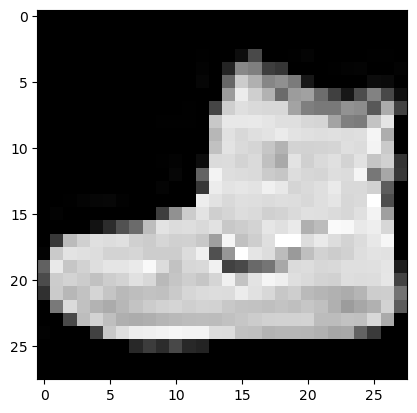

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
img = TF.to_tensor(img)

In [ ]:
img.shape, img.permute(1,2,0).shape

(torch.Size([1, 28, 28]), torch.Size([28, 28, 1]))

## Export -

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()